<a href="https://colab.research.google.com/github/Syauqi366/SyauqiRabbani_MachineLearning/blob/main/praktikum10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = "/content/gdrive/MyDrive/Praktikum_ml/praktikum10/"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE


In [ ]:
df_train = pd.read_excel(path + '/kelulusan_train.xls')
df_test = pd.read_excel(path + '/kelulusan_test.xls')

In [ ]:
df_train.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB


In [ ]:
df_test.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              145 non-null    object 
 1   JENIS KELAMIN     145 non-null    object 
 2   STATUS MAHASISWA  145 non-null    object 
 3   UMUR              145 non-null    int64  
 4   STATUS NIKAH      145 non-null    object 
 5   IPS 1             145 non-null    float64
 6   IPS 2             145 non-null    float64
 7   IPS 3             145 non-null    float64
 8   IPS 4             145 non-null    float64
 9   IPS 5             145 non-null    float64
 10  IPS 6             145 non-null    float64
 11  IPS 7             145 non-null    float64
 12  IPS 8             141 non-null    float64
 13  IPK               142 non-null    float64
 14  STATUS KELULUSAN  145 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 17.1+ KB


In [ ]:
print(df_train['STATUS MAHASISWA'].unique())
print(df_train['STATUS NIKAH'].unique())
print(df_train['JENIS KELAMIN'].unique())
print(df_train['UMUR'].unique())
print(df_train['STATUS KELULUSAN'].unique())

['BEKERJA' 'MAHASISWA']
['BELUM MENIKAH' 'MENIKAH']
['PEREMPUAN' 'LAKI - LAKI']
[28 32 29 27 26 25 31 30 50 42 24 23 47 41 36 22 40]
['TERLAMBAT' 'TEPAT']


In [ ]:
df_train = df_train.drop(columns=['STATUS NIKAH'])
df_test = df_test.drop(columns=['STATUS NIKAH'])


In [ ]:
replacements = {
    'JENIS KELAMIN': {'LAKI - LAKI': 1, 'PEREMPUAN': 0},
    'STATUS MAHASISWA': {'MAHASISWA': 0, 'BEKERJA': 1},
    'STATUS KELULUSAN': {'TERLAMBAT': 1, 'TEPAT': 0}
}

df_train = df_train.replace(replacements, inplace=False)
df_train.head()


/tmp/ipython-input-2157936817.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train = df_train.replace(replacements, inplace=False)


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,0,1,28,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,1
1,DWI HESTYNA PRIHASTANTY,0,0,32,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,1
2,MURYA ARIEF BASUKI,0,1,29,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,1
3,NANIK SUSANTI,0,0,27,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,1
4,RIFKA ISTIQFARINA,0,1,29,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,1


In [ ]:
df_test = df_test.replace(replacements, inplace=False)
df_test.head()


/tmp/ipython-input-3205589467.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test = df_test.replace(replacements, inplace=False)


,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,1,0,24,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,0
1,LEYLA TRIYANA PRATIWI,0,0,26,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,0
2,VERIS SOFIYAN PRAYOGA,1,0,29,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,0
3,ADITYA AKBAR NUGRAHA,1,0,27,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,0
4,ERNA EKA RIYANTI,0,0,25,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,0


In [ ]:
df_train.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0
IPS 6,0


In [ ]:
df_test.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0
IPS 6,0


In [ ]:
df_train = df_train.dropna(subset=['IPS 8'])
df_train = df_train.dropna(subset=['IPK '])

In [ ]:
df_test = df_test.dropna(subset=['IPS 8'])
df_test = df_test.dropna(subset=['IPK '])

In [ ]:
df_train.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0
IPS 6,0


In [ ]:
df_test.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0
IPS 6,0


In [ ]:
df_train = df_train.drop(columns=['NAMA'])
df_train.head(1)

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,0,1,28,2.76,2.8,3.2,3.17,2.98,3.0,3.03,0.0,3.07,1


In [ ]:
df_test = df_test.drop(columns=['NAMA'])
df_test.head(1)

,JENIS KELAMIN,STATUS MAHASISWA,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,1,0,24,3.17,2.7,3.23,2.41,3.0,2.47,1.75,0.0,2.75,0


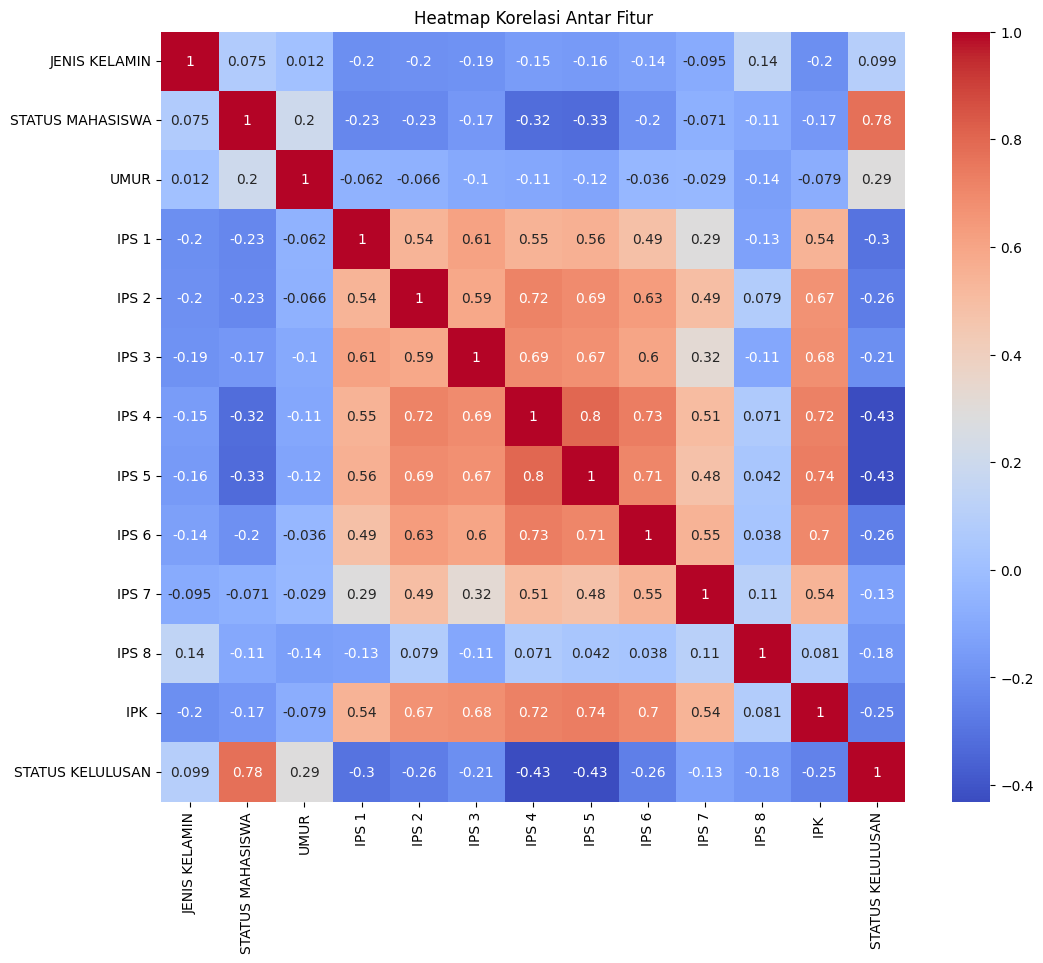

In [ ]:
correlation_matrix = df_train.corr(method='spearman')

# Analisis korelasi fitur
plt.figure(figsize=(12, 10))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()


/tmp/ipython-input-1019499280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='STATUS KELULUSAN', data=df_train, palette='Set2')


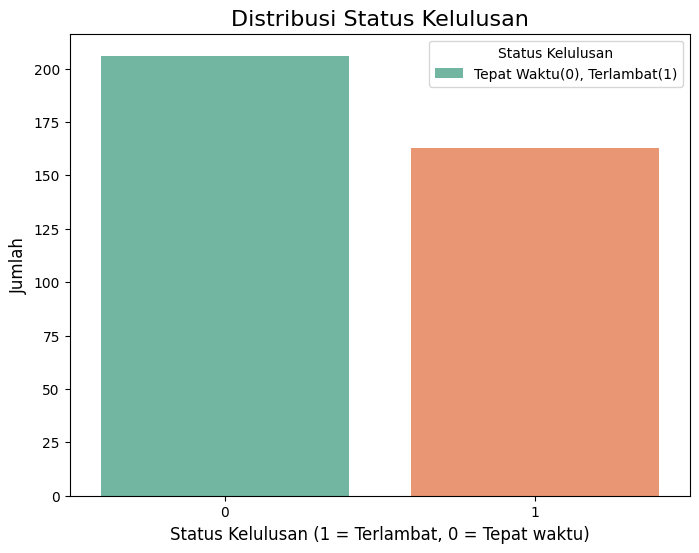

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='STATUS KELULUSAN', data=df_train, palette='Set2')

plt.title('Distribusi Status Kelulusan', fontsize=16)
plt.xlabel('Status Kelulusan (1 = Terlambat, 0 = Tepat waktu)', fontsize=12)
plt.ylabel('Jumlah', fontsize = 12)

plt.legend(title='Status Kelulusan', labels=['Tepat Waktu(0), Terlambat(1)'], loc='upper right')
plt.show()

In [ ]:
X_train = df_train.drop(columns=['STATUS KELULUSAN'])
y_train = df_train['STATUS KELULUSAN']

X_test = df_test.drop(columns=['STATUS KELULUSAN'])
y_test = df_test['STATUS KELULUSAN']

# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("Before SMOTE:")
print(y_train.value_counts())

sm = SMOTE(random_state=42, k_neighbors=1) # Set k_neighbors to 1
X_train_smote, y_train_smote = sm.fit_resample(X_train_scaled, y_train)

print("After SMOTE:")
print(y_train_smote.value_counts())


Before SMOTE:
STATUS KELULUSAN
0    206
1    163
Name: count, dtype: int64
After SMOTE:
STATUS KELULUSAN
1    206
0    206
Name: count, dtype: int64


In [ ]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(x_train_smote, y_train_smote)

print("Best Params:", grid.best_params_)
print("Best Score (CV):", grid.best_score_)


Best Params: {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Best Score (CV): 0.9029973552747576


In [ ]:
# Mengambil model KNN terbaik dari hasil GridSearchCV
best_knn = grid.best_estimator_

# Melatih model menggunakan data training hasil SMOTE
best_knn.fit(X_train_smote, y_train_smote)

# Melakukan prediksi pada data uji yang telah di-scaling
y_pred = best_knn.predict(X_test_scaled)

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00         2

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



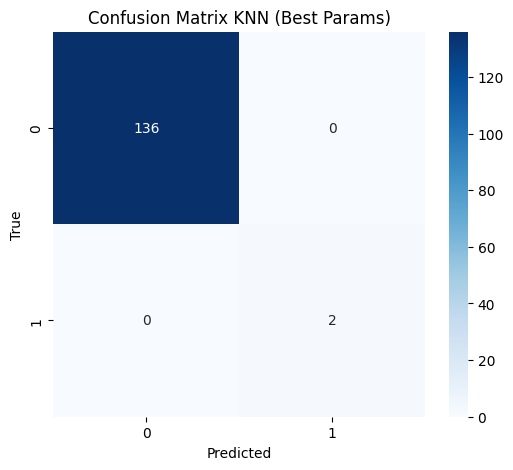

In [ ]:
# Membuat confusion matrix dari hasil prediksi
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix KNN (Best Params)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
# Melakukan Cross Validation pada model KNN terbaik
cv_scores = cross_val_score(best_knn, x_train_smote, y_train_smote, cv=5)

# Menampilkan hasil CV
print("Cross Validation Accuracy:", cv_scores.mean())
print("Std Dev.:", cv_scores.std())


Cross Validation Accuracy: 0.9029973552747576
Std Dev.: 0.042371318661662674


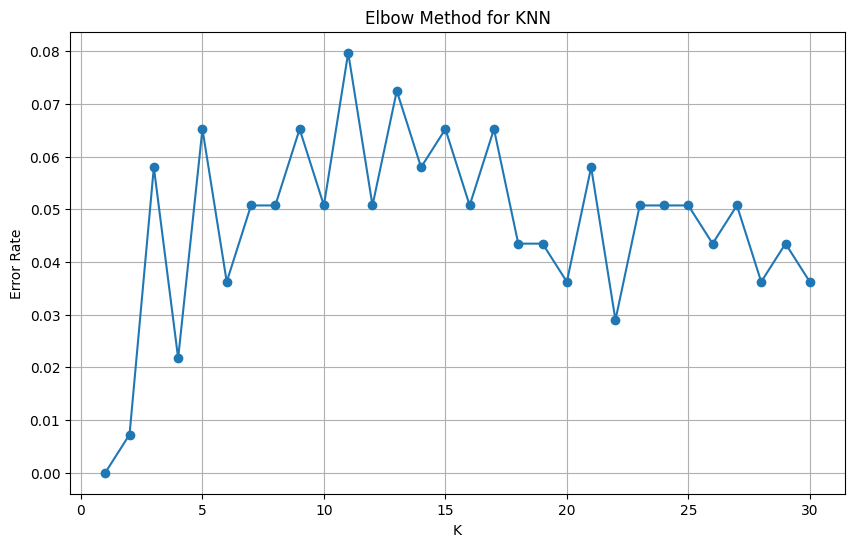

In [ ]:
# Menyimpan nilai error untuk setiap K
errors = []

# Mencoba nilai K dari 1 sampai 30
for k in range(1, 31):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_smote, y_train_smote)
    pred = knn_temp.predict(X_test_scaled)

    # Menghitung error rate
    errors.append(np.mean(pred != y_test))

# Visualisasi Error Rate
plt.figure(figsize=(10,6))
plt.plot(range(1, 31), errors, marker='o')
plt.title("Elbow Method for KNN")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.grid(True)
plt.show()
